# A test of the joint torque redistribution hypothesis

**Subjects at the comfortable speed**

> [Laboratory of Biomechanics and Motor Control](http://pesquisa.ufabc.edu.br/bmclab/)  
> Federal University of ABC, Brazil

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Python setup</a></span><ul class="toc-item"><li><span><a href="#Environment" data-toc-modified-id="Environment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Environment</a></span></li><li><span><a href="#Custom-functions" data-toc-modified-id="Custom-functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Custom functions</a></span></li></ul></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Data-selection" data-toc-modified-id="Data-selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data selection</a></span><ul class="toc-item"><li><span><a href="#Include-only-subjects-in-two-age-categories:-<=40-years-and-=>-55-years" data-toc-modified-id="Include-only-subjects-in-two-age-categories:-<=40-years-and-=>-55-years-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Include only subjects in two age categories: &lt;=40 years and =&gt; 55 years</a></span></li><li><span><a href="#Include-only-subjects-walking-at-the-comfortable-speed" data-toc-modified-id="Include-only-subjects-walking-at-the-comfortable-speed-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Include only subjects walking at the comfortable speed</a></span></li><li><span><a href="#Possible-outliers-in-data" data-toc-modified-id="Possible-outliers-in-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Possible outliers in data</a></span><ul class="toc-item"><li><span><a href="#Don't-remove-possible-outliers-for-now" data-toc-modified-id="Don't-remove-possible-outliers-for-now-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Don't remove possible outliers for now</a></span></li></ul></li></ul></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Inferential-statistics" data-toc-modified-id="Inferential-statistics-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Inferential statistics</a></span><ul class="toc-item"><li><span><a href="#Correlation-between-variables" data-toc-modified-id="Correlation-between-variables-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Correlation between variables</a></span></li><li><span><a href="#Test-for-difference-between-groups'-characteristics" data-toc-modified-id="Test-for-difference-between-groups'-characteristics-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Test for difference between groups' characteristics</a></span></li><li><span><a href="#Test-for-difference-between-groups'-spatio-temporal-variables" data-toc-modified-id="Test-for-difference-between-groups'-spatio-temporal-variables-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Test for difference between groups' spatio-temporal variables</a></span></li><li><span><a href="#Test-for-difference-between-groups'-joint-torque-and-power-variables" data-toc-modified-id="Test-for-difference-between-groups'-joint-torque-and-power-variables-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Test for difference between groups' joint torque and power variables</a></span></li></ul></li><li><span><a href="#Regression-models" data-toc-modified-id="Regression-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Regression models</a></span><ul class="toc-item"><li><span><a href="#Data-normalization" data-toc-modified-id="Data-normalization-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Data normalization</a></span><ul class="toc-item"><li><span><a href="#Replace-letters-by-numeric-values-because-it's-easier-to-identify-the-effect" data-toc-modified-id="Replace-letters-by-numeric-values-because-it's-easier-to-identify-the-effect-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Replace letters by numeric values because it's easier to identify the effect</a></span></li></ul></li><li><span><a href="#Age,-Step-Length,-Cadence-and-Speed-(Step-Length-×-Cadence)" data-toc-modified-id="Age,-Step-Length,-Cadence-and-Speed-(Step-Length-×-Cadence)-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Age, Step Length, Cadence and Speed (Step Length × Cadence)</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Introduction

This notebook reports the statistical results of testing two hypotheses:  
1. Aging is associated to a redistribution of joint torques and powers during gait (proposed by DeVita and Hortobagyi in 2000).  
2. Such age-related redistribution of joint torques and powers during gait is due to differences in spatio-temporal variables, such as step length, cadence and speed (proposed by Lim, Lin and Pandy in 2013).

The experimental data are taken from an open dataset (Fukuchi et al., 2018). This dataset contains raw and processed data from standard 3d gait analysis of healthy volunteers walking in both overground and treadmill in a range of speeds. 

The discrete variables were calculated according to reported by DeVita and Hortobagyi (2000).  

## Python setup

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.subplots import make_subplots
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import pingouin as pg
from tqdm.notebook import tqdm
%load_ext watermark  

### Environment

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.1)
#palette = sns.color_palette(palette='Set1')  # tab10
#palette[0], palette[1] = palette[1], palette[0]
#sns.set_palette(palette=palette)
pd.set_option('precision', 3)  # number of decimal places for the environment

path2 = Path(r'./')
# number of bootstraps to be performed
n_boots = 100
# significance level
alpha = 0.05
# colors
#colors = sns.color_palette()
colors = plotly.colors.DEFAULT_PLOTLY_COLORS
colors2 = [tuple(np.fromstring(c[4:-1], sep=',')/255) for c in colors]

%watermark
%watermark --iversions

Last updated: 2021-08-18T01:34:54.577604-03:00

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.26.0

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.11.0-31-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

statsmodels: 0.12.2
pandas     : 1.3.2
json       : 2.0.9
matplotlib : 3.4.3
seaborn    : 0.11.2
plotly     : 5.2.1
autopep8   : 1.5.6
numpy      : 1.21.2
pingouin   : 0.4.0



### Custom functions

In [3]:
def ttest(df, feature, group, levels=None, alpha=alpha):
    """t-test statistcs for dataframe columns using the pingouin library.
    """
    stats = pd.DataFrame()
    if levels is None:
        levels = df[group].unique()
    if len(levels) != 2:
        raise Exception('Incorrect number of levels: {}'.format(len(levels)))
    for f in feature:
        x = df[df[group] == levels[0]][f]
        y = df[df[group] == levels[1]][f]
        stat = pg.ttest(x, y, confidence=1-alpha)
        stat.index = [f]
        diff = np.round(100 * (np.mean(x) - np.mean(y)) / np.mean(y), 0)
        diff = pd.DataFrame(data=diff, index=[f], columns=['%diff'], dtype=int)
        stat = pd.concat([stat, diff], axis=1)
        stats = pd.concat([stats, stat], axis=0)
    stats.drop(columns=['alternative', 'BF10', 'power'], inplace=True)
    stats.index.name = '{}-{}'.format(*levels)
    display(stats.style.format({'p-val': '{:.3f}'}).apply(sig_red, subset='p-val', axis=1))
    return stats


def normtest(df, feature, group, alpha=alpha):
    """Normality test for dataframe columns using the pingouin library.
    """
    levels = df[group].unique()
    for level in levels:
        test = pg.normality(df[df[group] == level][feature], method='normaltest')
        test.index.name = level
        display(test.style.format({'pval': '{:.3f}'}).apply(sig_red, axis=1))


def normality(df):
    """Get the p-val of the normality test using the pingouin library.
    """
    return pg.normality(df)['pval']


def describe(df, feature, group, stat=['count', 'mean', 'std', 'min', 'max', normality]):
    """Descriptive statistics for dataframe columns.
    """
    col = [('Young', 'normality'), ('Older', 'normality')]
    x = df.groupby(group)[feature].agg(stat).stack().transpose().style.apply(sig_red, subset=col)
    display(x)
    return x


def sig_red(col, alpha=alpha):
    """Returns string 'color: red' for `col` < `alpha`, black otherwise.
    """
    col = np.array([(float(x[1:]) if isinstance(x, str) else float(x))
                    if len(str(x)) else np.nan for x in col])
    
    is_sig = col < alpha
    return ['color: red' if x else 'color: black' for x in is_sig]


def regression(fit_ml, fit_re, names):
    """Get results from linear regression as list.

    results = ['Response', 'Coef', 'CI', 'p', 'Coef', 'CI', 'p', Coef', 'CI', 'p',
               'llf', 'AIC', 'R2']
    """
    # print(fit_re.model.exog_names)
    if names is None:
        names = fit_re.model.exog_names[1:]
    results = [np.nan]*(1 + len(names)*3 + 3)
    # response
    results[ 0] = fit_re.model.endog_names
    # log-likelihood function
    results[-3] = '{:.1f}'.format(fit_ml.llf)
    # Akaike information criterion
    results[-2] = '{:.1f}'.format(fit_ml.aic)
    # marginal R2, proportion of variance explained by the fixed factor(s) alone
    results[-1] = '{:.2f}'.format(np.corrcoef(fit_re.model.endog, fit_re.predict())[0, 1]**2)
    # conditional R2, proportion of variance explained by both the fixed and random factors
    #results[-1] = np.round(np.corrcoef(fit_re.model.endog, fit_re.fittedvalues)[0, 1]**2, 2)
    for name in fit_re.model.exog_names[1:]:
        idx = names.index(name)
        # fitted fixed-effects coefficients
        results[3*idx+1] = '{:.2f}'.format(fit_re.params[name])
        # confidence interval for the fitted parameters
        ci = fit_re.conf_int().loc[name].values
        results[3*idx+2] = '[{:.2f}, {:.2f}]'.format(ci[0], ci[1])
        # two-tailed p values for the t-stats of the params
        if fit_re.pvalues[name] < 0.0001:
            results[3*idx+3] = '< 0.0001'
        else:
            results[3*idx+3] = '{:.4f}'.format(fit_re.pvalues[name])

    return results


def runmodels(data, predictors, responses, groups, names, mixed=True, show=True):
    """Run OLS or mixed linear regression models.
    """
    fit_ml = []
    fit_re = []
    models = []
    i = 0
    print('Running regression models...')
    for response in responses:
        for predictor in predictors:
            eq = '{} ~ {}'.format(response, predictor)
            print(response, predictor)
            if mixed:
                md = smf.mixedlm(formula=eq, data=data, groups=groups)  
            else:
                md = smf.ols(formula=eq, data=data)
            # use ML method to estimate AIC and llf
            fit_ml.append(md.fit(reml=False))
            # use REML method to get unbiased estimations of the coefficients
            fit_re.append(md.fit(reml=True))
            models.append(regression(fit_ml[-1], fit_re[-1], names=names))
            if mixed:
                text = 'converged' if fit_re[-1].converged else 'didn\'t converge'
            if show:
                if mixed:
                    print('Model {:2}: {} {}.'.format(i, eq, text))
                else:
                    print('Model {:2}: {}.'.format(i, eq))
                #display(fit_re[-1].summary())
            i += 1
    if show:
        print('...done.')
    
    return models, fit_ml, fit_re


def display_table(models, names, del_name_idx=None, filename=None):
    """Display rich table with stats from regression models.
    """
    h0, h1, h2 = ['Feature'], ['Feature'], ['Feature']
    h0.extend(['Predictor']*3*len(names))
    for name in names:
        h1.extend(name*3)
    h2.extend(['Coef', 'CI', 'p-value']*len(names))
    h0.extend(['LLF', 'AIC', 'R2'])
    h1.extend(['LLF', 'AIC', 'R2'])
    h2.extend(['LLF', 'AIC', 'R2'])
    table = pd.DataFrame(data=models)
    table.columns=[h0, h1, h2]
    table.replace({np.nan: ''}, inplace=True)
    if del_name_idx is not None:
        for col in del_name_idx:
            table = table.drop(columns=names[col], level=1)
    if filename is not None:
        table.to_csv(path2 / filename, sep='\t', index=False)
    table = table.style \
            .apply(sig_red, subset=[c for c in table.columns if c[-1] == 'p-value']) \
            .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
    
    return table


def plot_residuals(fit=None, residuals=None, kind='marginal', x=None,
                   xlabel=None, ylabel=None, alpha=0.05, hover=None):
    """Scater plot, histogram and Q-Q plot for testing residuals.
    
    This function generates three subplots (1x3):
    1. Scatter plot of the residuals versus predictor variables.
    2. Histogram of the residuals and the expected normal function.
    3. Q-Q plot.
    
    On the third plot are also shown the statistic and p-value of the
    Shapiro-Wilk test for normality. These values are also returned as output
    of the function.
    
    Parameters
    ----------
    fit: statsmodels regression results or None, optional (default=None)
        `fit` is a mod.fit() structure
        See https://www.statsmodels.org/stable/regression.html
        The residuals and predictor values are taken from this parameter.
    
    residuals: 1-D array_like or None, optional (default=None)
        The residuals to test the normality. Enter this parameter only if
        `fit` is not inputed.
        
    kind: {'marginal', 'conditional'}, optional (default='marginal')
        Which kind of residuals to test (only if `fit` is inputed).
        'marginal': residuals from fixed effects
        'conditional': residuals from fixed and random effects
    
    x: 1-D array_like or None, optional (default=None)
        The predictor values.
    
    xlabel: string or None, optional (default=None)
        The predictor label.
    
    ylabel: string or None, optional (default=None)
        The response label.
    
    alpha: float, optional (default=0.05)
        The significance level
        
    hover: tuple (string, 1-D array_like) or None, optional (default=None)
        Information to show when hovering the data in the first plot.
        See the examples.
    
    
    Returns
    -------
    statistic: float
        The statistic of the Shapiro-Wilk test for normality.
    p-value: float
        The p-value of the null-hypothesis test for normality.
        
    Notes
    -----
    https://www.statsmodels.org/stable/_modules/statsmodels/regression/mixed_linear_model.html
    fit.model.fit().predict() or fit.predict() only reflect 
     fixed effects mean structure of the model.
    fit.model.fit().fittedvalues or fit.fittedvalues reflect the mean
     structure specified by fixed effects and predicted random effects.
    
    Examples
    --------
    >>> residuals = np.random.normal(loc=0.0, scale=1.0, size=1000)
    >>> plot_residuals(residuals=residuals)
    >>> residuals = np.random.lognormal(mean=1.0, sigma=0.5, size=100)
    >>> plot_residuals(residuals=residuals, xlabel= 'X', ylabel='Y')
    >>> residuals = np.random.lognormal(mean=1.0, sigma=0.5, size=10)
    >>> plot_residuals(residuals=residuals, hover=('Datum', np.arange(10)))
    """
    
    import numpy as np
    import scipy as sp
    import plotly
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    import plotly.figure_factory as ff
    
    if fit is not None:
        # fit.model.fit().predict() or fit.predict() only reflect 
        #  fixed effects mean structure of the model.
        # fit.model.fit().fittedvalues or fit.fittedvalues reflect the mean
        #  structure specified by fixed effects and predicted random effects.
        if kind == 'marginal':
            residuals = fit.model.endog - fit.model.fit().predict() 
        elif kind == 'conditional':
            residuals = fit.model.endog - fit.model.fit().fittedvalues 
        else:
            raise ValueError("Valid options for 'kind': 'marginal' or 'conditional'.")
        x = fit.model.exog[:, 1]
    else:
        if residuals is None:
            raise ValueError('If fit is None, residuals cannot be None.')
        if x is None:
            x = np.arange(0, len(residuals))
    if xlabel is None:
        xlabel = 'Predictor'
    if ylabel is None:
        ylabel = 'Response'

    # normality of residuals test
    W, p = sp.stats.shapiro(residuals)  # Shapiro-Wilk test
    if p < 0.001:
        p_str = 'p < 0.001'
    else:
        p_str = 'p = {:.3f}'.format(p)
    # plots
    fig = make_subplots(rows=1, cols=3, horizontal_spacing=0.1,
                        subplot_titles=('Scatter plot', 'Histogram', 'Q-Q plot'))
    # scatter plot
    if hover is not None:
        label, data = hover[0], hover[1]
        template = ['<b>{}: '.format(label) + '%{customdata}</b> <br>' +
                    '{}: '.format(xlabel) + '%{x} <br>Residual: %{y} ']
        fig.add_trace(go.Scatter(x=x, y=residuals, mode='markers',
                                 marker=dict(color=colors[0]),
                                 customdata=data,
                                 hovertemplate=template[0],
                                 name=''),
                      row=1, col=1)        
    else:
        fig.add_trace(go.Scatter(x=x, y=residuals, mode='markers', name='',
                                 marker=dict(color=colors[0])), row=1, col=1)
    if min(residuals)<=0 and max(residuals)>=0:
        fig.add_hline(y=0, line=dict(width=2, color='rgba(0,0,0,.5)'), row=1, col=1)
    # histogram
    fig.add_trace(go.Histogram(x=residuals, marker_color=colors[0], name='',
                               histnorm='probability density'), row=1, col=2)
    norm = ff.create_distplot([residuals], group_labels=[''],
                              curve_type='normal', show_rug=False).data[1]
    fig.add_trace(go.Scatter(x=norm['x'], y=norm['y'], mode = 'lines', name='',
                             line=dict(width=3, color=colors[1])), row=1, col=2)  
    # Q-Q plot
    qq = sp.stats.probplot(residuals, dist='norm')
    qqx = np.array([qq[0][0][0], qq[0][0][-1]])
    fig.add_trace(go.Scatter(x=qq[0][0], y=qq[0][1], mode='markers', name='',
                             marker=dict(color=colors[0])), row=1, col=3)
    fig.add_trace(go.Scatter(x=qqx, y=qq[1][1] + qq[1][0]*qqx, mode='lines', name='',
                             line=dict(width=3, color=colors[1])), row=1, col=3) 
    fig.add_annotation(text='W = {:.2f}<br>{}'.format(W, p_str),
                       xref='x domain', yref='y domain', align='left', valign='top',
                       x=0.02, y=0.98, showarrow=False, row=1, col=3)        
    # x and y axes properties
    fig.update_xaxes(title_text=xlabel, row=1, col=1)
    fig.update_xaxes(title_text='Residuals', row=1, col=2)
    fig.update_xaxes(title_text='Normal theoretical quantiles', row=1, col=3)
    fig.update_yaxes(title_text='Residuals', row=1, col=1)
    fig.update_yaxes(title_text='Probability density', row=1, col=2)
    fig.update_yaxes(title_text='Observed data quantiles', row=1, col=3)

    text='Normality tests for residuals of {} &times; {}'.format(ylabel, xlabel)
    fig.update_layout(showlegend=False, height=400, font_color='black',
                      title=dict(text=text, x=.5, xanchor='center', yanchor='top',
                                 font=dict(size=20)))
    fig.show()
    print(['We {}reject the null hypothesis that the residuals come from a population' +
           ' with normal distribution\n(Shapiro-Wilk test: W({}) = {:.2f}, {}).'
          ][0].format('failed to ' if p>alpha else '', len(x), W, p_str))
    
    return W, p

   
def bootstrap(df, df2, response, predictor, groups, n_boots=1000):
    """Bootstrap observations for parameter estimation of linear mixed effects model.
    """
    y_boot = np.zeros((df2.shape[0], n_boots))
    eq = '{} ~ {}'.format(response, predictor)
    for i in tqdm(range(n_boots)):
        y_boot[:, i] = smf.mixedlm(formula=eq,
                                   groups=groups,
                                   data=df.sample(n=df.shape[0], replace=True)
                                  ).fit().predict(df2)
    return y_boot


def boxplots(df, var=['Speed', 'Cadence', 'StepLength', 'H2A_M', 'H2A_I', 'H2A_W']):
    """Boxplots of variables var in df
    """
    fig, axs = plt.subplots(1, len(var), figsize=(12, 3),
                            gridspec_kw={'hspace':.1, 'wspace':.5})
    for ax, v in zip(axs, var):
        sns.boxplot(x='AgeGroup', y=v, data=df, fliersize=9, ax=ax)
        sns.swarmplot(x='AgeGroup', y=v, data=df, ax=ax, color='gray')
        ax.set_title(v)
        ax.set_ylabel('')
    plt.show()


## Read data

In [4]:
# file with discrete variables calculated by 'Walking speed torque  .ipynb'
filename = path2 / 'wbdsRedist_clean3.csv'
df = pd.read_csv(filename)
df.drop(columns=['SpeedRaw', 'Subject.1', 'StepTime'], inplace=True)  # unused columns
# Height cm to meters and stride to step length
df['Height'] = df['Height']/100
df['StepLength'] = df['StepLength']/2
# Append BMI and Froude number for gait speed
df = df.assign(BMI = df['Mass']/df['Height']**2)
df = df.assign(SpeedFroude = df['Speed'].values/np.sqrt((9.81*df['LegLength'].values)))
# rename columns
df.rename(columns={'SpeedCategory':'SpeedCat',
                   'PeakHipMom':'Hip_M', 'PeakKneeMom': 'Knee_M',
                   'PeakAnkleMom': 'Ankle_M', 'Hip2AnkleRatio': 'H2A_M',
                   'hipEXTimp': 'Hip_Iext', 'hipFLXimp': 'Hip_Iflx',
                   'kneeEXTimp': 'Knee_Iext', 'ankleEXTimp': 'Ankle_Iext',
                   'hip2ankleRatioImp': 'H2A_I', 'hipPOSwork': 'Hip_Wpos',
                   'hipNEGwork': 'Hip_Wneg', 'kneePOSwork': 'Knee_Wpos',
                   'kneeNEGwork': 'Knee_Wneg', 'anklePOSwork': 'Ankle_Wpos',
                   'ankleNEGwork': 'Ankle_Wneg', 'hip2ankleRatioWork': 'H2A_W'},
          inplace=True)
# comfortable speed as a new variable (column)        
df = df.assign(SpeedComf = df.Speed)
for s in df['Subject'].unique():
    df.at[df['Subject']==s, 'SpeedComf'] = df[(df['Subject']==s) &
                                              (df['SpeedCat']=='V5')]['Speed'].values[0]  
# reorder columns and drop data for knee
df = df[['Subject', 'AgeGroup', 'Gender', 'Age', 'Height', 'Mass', 'BMI', 'LegLength',
         'SpeedCat', 'SpeedComf', 'Speed', 'StepLength', 'Cadence',
         'H2A_M', 'H2A_I', 'H2A_W']]
df

,Subject,AgeGroup,Gender,Age,Height,Mass,BMI,LegLength,SpeedCat,SpeedComf,Speed,StepLength,Cadence,H2A_M,H2A_I,H2A_W
0,1,Young,M,25,1.725,74.30,24.970,0.89,V1,1.21,0.49,0.434,67.797,0.453,0.387,1.370
1,1,Young,M,25,1.725,74.30,24.970,0.89,V2,1.21,0.67,0.505,80.990,0.393,0.342,2.419
2,1,Young,M,25,1.725,74.30,24.970,0.89,V3,1.21,0.85,0.593,86.747,0.475,0.332,2.189
3,1,Young,M,25,1.725,74.30,24.970,0.89,V4,1.21,1.03,0.623,99.723,0.557,0.381,1.534
4,1,Young,M,25,1.725,74.30,24.970,0.89,V5,1.21,1.21,0.647,112.500,0.601,0.369,1.679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,49,Older,F,73,1.610,84.85,32.734,0.80,V2,0.84,0.46,0.390,71.146,0.497,0.481,2.757
290,49,Older,F,73,1.610,84.85,32.734,0.80,V3,0.84,0.59,0.430,81.818,0.499,0.444,2.079
291,49,Older,F,73,1.610,84.85,32.734,0.80,V4,0.84,0.71,0.467,91.603,0.497,0.425,3.070
292,49,Older,F,73,1.610,84.85,32.734,0.80,V5,0.84,0.84,0.509,98.630,0.543,0.434,2.412


## Data selection

Let's replicate similar conditions of the DeVita and Hortobagyi (2000) study:  
 - Two age categories (Young adults and Older adults).  
 - All subjects walking at a self-selected comfortable speed on a treadmill (for a more reliable control of speed). 

In [5]:
df0 = df.copy(deep=True)

### Include only subjects in two age categories: <=40 years and => 55 years

In [6]:
df = df.drop(index=df[(df.Age > 40) & (df.Age < 55)].index, inplace=False)

### Include only subjects walking at the comfortable speed 

In [7]:
df = df[df['SpeedCat']=='V5'].drop(columns=['SpeedCat'])
df

,Subject,AgeGroup,Gender,Age,Height,Mass,BMI,LegLength,SpeedComf,Speed,StepLength,Cadence,H2A_M,H2A_I,H2A_W
4,1,Young,M,25,1.725,74.30,24.970,0.890,1.21,1.21,0.647,112.500,0.601,0.369,1.679
10,2,Young,F,22,1.668,52.90,19.014,0.865,1.25,1.25,0.523,143.141,0.638,0.241,0.723
16,3,Young,M,33,1.793,75.85,23.594,0.938,0.98,0.98,0.587,100.418,0.356,0.161,0.531
22,4,Young,M,24,1.840,61.05,18.032,0.938,1.30,1.30,0.665,117.840,0.578,0.400,1.159
28,5,Young,M,28,1.709,77.55,26.552,0.863,1.29,1.29,0.649,119.601,0.589,0.366,1.077
34,6,Young,M,25,1.742,83.15,27.401,0.910,1.28,1.28,0.664,115.200,0.552,0.353,0.840
40,7,Young,F,24,1.575,71.75,28.924,0.840,1.10,1.10,0.582,113.208,0.334,0.221,1.102
46,8,Young,M,36,1.825,64.00,19.216,0.970,1.38,1.38,0.714,115.756,0.560,0.414,1.042
52,9,Young,F,25,1.691,61.25,21.420,0.840,1.17,1.17,0.616,113.565,0.493,0.344,1.724
58,10,Young,F,31,1.622,61.70,23.452,0.865,1.37,1.37,0.652,126.095,0.427,0.206,0.767


### Possible outliers in data

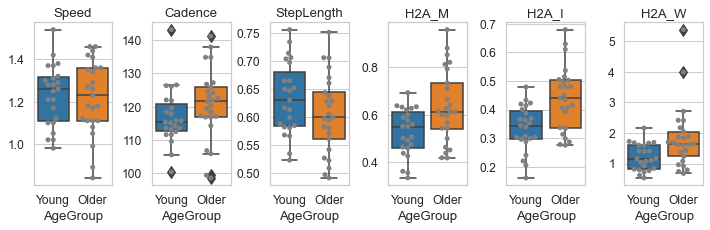

In [8]:
var = ['Age', 'Height', 'Mass', 'BMI', 'LegLength', 'Speed', 'StepLength', 'Cadence',
       'H2A_M', 'H2A_I', 'H2A_W']
describe(df, feature=var, group='AgeGroup');
boxplots(df)

#### Don't remove possible outliers for now

Features `Cadence` for both groups and `H2A_W` for the Older group don't present normal distribution.  
Inpecting the boxplots, a few extreme values might be the cause for non-normality.  
Since our main data analysis is based on linear regression, we will not remove these outliers for now; we will remove outliers only if they cause violations of the linear regression assumptions.

In [9]:
# Outlier for variables H2A
subject = df[df['H2A_W'] > 3]['Subject']
print(subject)
# uncomment the following line to remove these data:
df = df.drop(index=subject.index, inplace=False)

214    36
226    38
Name: Subject, dtype: int64


In [10]:
# Outlier for variable Cadence
subject = df[df['Cadence'] > 140]['Subject']
print(subject)
# uncomment the following line to remove these data:
#df = df.drop(index=subject.index, inplace=False)

10      2
154    26
Name: Subject, dtype: int64


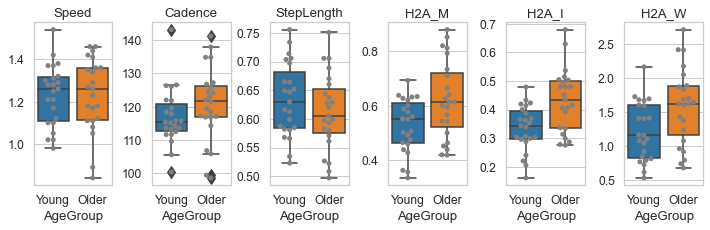

In [11]:
describe(df, feature=var, group='AgeGroup');
boxplots(df)

## Descriptive statistics

Let's visualize the data with pair plots and histograms for the main variables.

In [12]:
display(df.drop_duplicates(subset='Subject', inplace=False)[
        ['Subject', 'AgeGroup', 'Gender']].groupby(['AgeGroup', 'Gender']).count().T)

AgeGroup Older     Young    
Gender       F   M     F   M
Subject     11  12     9  14

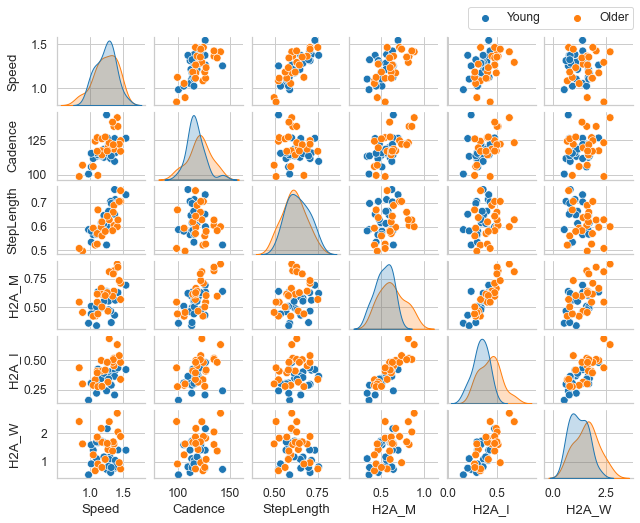

In [13]:
g = sns.pairplot(df, vars=['Speed', 'Cadence', 'StepLength', 'H2A_M', 'H2A_I', 'H2A_W'],
                 diag_kind='auto', hue='AgeGroup', plot_kws={'s':60}, height=1.2, aspect=1.1)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g._legend.remove()
g.fig.legend(handles=handles, labels=labels, loc='upper right', ncol=2,
             bbox_to_anchor=(1, 1.02), bbox_transform=plt.gcf().transFigure)
g.fig.subplots_adjust(left=.1, right=.99, bottom = 0.1, top=.95, hspace=.1, wspace=.1)
g.fig.align_ylabels(g.axes[:, 0])
plt.show()

## Inferential statistics

### Correlation between variables

In [14]:
var = ['Speed', 'Cadence', 'StepLength', 'H2A_M', 'H2A_I', 'H2A_W']
corr = df[df['AgeGroup']=='Young'][var].rcorr(stars=True)
display(corr.style.set_caption('Correlation matrix for group Young'))
corr = df[df['AgeGroup']=='Older'][var].rcorr(stars=True)
display(corr.style.set_caption('Correlation matrix for group Older'))

,Speed,Cadence,StepLength,H2A_M,H2A_I,H2A_W
Speed,-,*,***,*,*,
Cadence,0.496,-,,*,,
StepLength,0.815,-0.094,-,,,
H2A_M,0.507,0.479,0.271,-,***,
H2A_I,0.454,0.184,0.386,0.763,-,**
H2A_W,-0.106,0.075,-0.205,0.378,0.592,-


,Speed,Cadence,StepLength,H2A_M,H2A_I,H2A_W
Speed,-,***,***,***,*,
Cadence,0.664,-,,**,**,
StepLength,0.78,0.054,-,,,
H2A_M,0.668,0.612,0.346,-,***,**
H2A_I,0.517,0.537,0.213,0.896,-,***
H2A_W,-0.024,0.142,-0.188,0.583,0.668,-


In [15]:
# A more detailed correlation table:
d = df[df['AgeGroup']=='Young'][var].pairwise_corr(method='pearson')
display(d.style.format({'p-unc': '{:.3f}'}).apply(sig_red, subset=['p-unc'])
        .set_caption('Pairwise correlation for group Young'))
d = df[df['AgeGroup']=='Older'][var].pairwise_corr(method='pearson')
display(d.style.format({'p-unc': '{:.3f}'}).apply(sig_red, subset=['p-unc'])
        .set_caption('Pairwise correlation for group Older'))

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Speed,Cadence,pearson,two-sided,23,0.496,[0.11 0.75],0.016,3.948,0.697
1,Speed,StepLength,pearson,two-sided,23,0.815,[0.61 0.92],0.000,9477.076,0.999
2,Speed,H2A_M,pearson,two-sided,23,0.507,[0.12 0.76],0.014,4.566,0.721
3,Speed,H2A_I,pearson,two-sided,23,0.454,[0.05 0.73],0.030,2.402,0.606
4,Speed,H2A_W,pearson,two-sided,23,-0.106,[-0.5 0.32],0.630,0.289,0.077
5,Cadence,StepLength,pearson,two-sided,23,-0.094,[-0.49 0.33],0.671,0.282,0.071
6,Cadence,H2A_M,pearson,two-sided,23,0.479,[0.08 0.74],0.021,3.195,0.661
7,Cadence,H2A_I,pearson,two-sided,23,0.184,[-0.25 0.55],0.401,0.361,0.135
8,Cadence,H2A_W,pearson,two-sided,23,0.075,[-0.35 0.47],0.735,0.273,0.063
9,StepLength,H2A_M,pearson,two-sided,23,0.271,[-0.16 0.61],0.211,0.54,0.244


,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Speed,Cadence,pearson,two-sided,23,0.664,[0.35 0.84],0.001,70.62,0.954
1,Speed,StepLength,pearson,two-sided,23,0.780,[0.54 0.9 ],0.000,2135.866,0.997
2,Speed,H2A_M,pearson,two-sided,23,0.668,[0.35 0.85],0.000,76.833,0.956
3,Speed,H2A_I,pearson,two-sided,23,0.517,[0.13 0.77],0.011,5.229,0.741
4,Speed,H2A_W,pearson,two-sided,23,-0.024,[-0.43 0.39],0.913,0.26,0.051
5,Cadence,StepLength,pearson,two-sided,23,0.054,[-0.37 0.46],0.807,0.266,0.056
6,Cadence,H2A_M,pearson,two-sided,23,0.612,[0.27 0.82],0.002,24.098,0.900
7,Cadence,H2A_I,pearson,two-sided,23,0.537,[0.16 0.78],0.008,6.902,0.780
8,Cadence,H2A_W,pearson,two-sided,23,0.142,[-0.29 0.52],0.518,0.315,0.099
9,StepLength,H2A_M,pearson,two-sided,23,0.346,[-0.08 0.66],0.106,0.885,0.375


### Test for difference between groups' characteristics

In [16]:
var = ['Age', 'Height', 'Mass', 'BMI', 'LegLength']
stats = ttest(df, var, 'AgeGroup', levels=['Older', 'Young'])

,T,dof,p-val,CI95%,cohen-d,%diff
Older-Young,,,,,,
Age,26.179,44,0.000,[33.91 39.57],7.720,133
Height,-2.375,44,0.022,[-0.14 -0.01],0.700,-4
Mass,-0.109,44,0.913,[-7.9 7.09],0.032,-1
BMI,1.585,44,0.120,[-0.47 3.96],0.467,7
LegLength,-1.430,44,0.160,[-0.07 0.01],0.422,-3


### Test for difference between groups' spatio-temporal variables

In [17]:
var = ['Speed', 'Cadence', 'StepLength']
stats = ttest(df, var, 'AgeGroup', levels=['Older', 'Young'])

,T,dof,p-val,CI95%,cohen-d,%diff
Older-Young,,,,,,
Speed,0.028,44,0.978,[-0.09 0.1 ],0.008,0
Cadence,1.270,44,0.211,[-2.17 9.58],0.374,3
StepLength,-1.100,44,0.277,[-0.06 0.02],0.324,-3


### Test for difference between groups' joint torque and power variables

In [18]:
var = ['H2A_M', 'H2A_I', 'H2A_W']
stats = ttest(df, var, 'AgeGroup', levels=['Older', 'Young'])

,T,dof,p-val,CI95%,cohen-d,%diff
Older-Young,,,,,,
H2A_M,2.644,44,0.011,[0.02 0.17],0.780,18
H2A_I,3.423,44,0.001,[0.04 0.15],1.009,29
H2A_W,2.509,44,0.016,[0.07 0.67],0.740,31


## Regression models

The predictors are Age (as categorical), cadence, step length.  
The response variables are H2A_M, H2A_I and H2A_W.

### Data normalization

Normalize data for satisfying linear regression assumptions, but this step has no effect on the final results.

In [19]:
dfraw = df.copy(deep=True)
var = ['Height', 'Mass', 'BMI', 'LegLength', 'Speed', 'Cadence', 'StepLength',
       'H2A_M', 'H2A_I', 'H2A_W']
# Standardization (mean 0, variance 1)
df[var] = df[var].apply(lambda x: (x-x.mean())/x.std(), axis=0)

#### Replace letters by numeric values because it's easier to identify the effect  
E.g.: {'Y': 0, 'O': 1} implies that if there is an effect of Age and its coefficient (slope) is positive, it means that the response increases for older subjects and decreases for young subjects. Internally the letters were replaced by numbers anyway but we didn't know the order.

In [20]:
df.loc[:, 'AgeGroup'].replace({'Young': 0, 'Older': 1}, inplace=True)
df.loc[:, 'Gender'].replace({'F': 0, 'M': 1}, inplace=True)

### Age, Step Length, Cadence and Speed (Step Length × Cadence)

Of note, the variable Speed is equal to the product between the variables Step Length and Cadence.

In [21]:
features = ['H2A_M', 'H2A_I', 'H2A_W']
labels   = ['H2A_M', 'H2A_I', 'H2A_W']

predictors = ['C(AgeGroup)',
              'StepLength',
              'Cadence',
              'Speed',
              'C(AgeGroup) + StepLength',
              'C(AgeGroup) + Cadence',
              'C(AgeGroup) + Speed',
              'C(AgeGroup) + StepLength + Cadence',
              'StepLength + Cadence',
              'StepLength + Cadence + Speed',
              'C(AgeGroup) + StepLength + Cadence + Speed'
             ]
groups = df['Subject']

names = ['C(AgeGroup)[T.1]', 'StepLength', 'Cadence', 'Speed']
models, fit_ml, fit_re = runmodels(df, predictors, features, groups=None, names=names, mixed=False)

Running regression models...
H2A_M C(AgeGroup)
Model  0: H2A_M ~ C(AgeGroup).
H2A_M StepLength
Model  1: H2A_M ~ StepLength.
H2A_M Cadence
Model  2: H2A_M ~ Cadence.
H2A_M Speed
Model  3: H2A_M ~ Speed.
H2A_M C(AgeGroup) + StepLength
Model  4: H2A_M ~ C(AgeGroup) + StepLength.
H2A_M C(AgeGroup) + Cadence
Model  5: H2A_M ~ C(AgeGroup) + Cadence.
H2A_M C(AgeGroup) + Speed
Model  6: H2A_M ~ C(AgeGroup) + Speed.
H2A_M C(AgeGroup) + StepLength + Cadence
Model  7: H2A_M ~ C(AgeGroup) + StepLength + Cadence.
H2A_M StepLength + Cadence
Model  8: H2A_M ~ StepLength + Cadence.
H2A_M StepLength + Cadence + Speed
Model  9: H2A_M ~ StepLength + Cadence + Speed.
H2A_M C(AgeGroup) + StepLength + Cadence + Speed
Model 10: H2A_M ~ C(AgeGroup) + StepLength + Cadence + Speed.
H2A_I C(AgeGroup)
Model 11: H2A_I ~ C(AgeGroup).
H2A_I StepLength
Model 12: H2A_I ~ StepLength.
H2A_I Cadence
Model 13: H2A_I ~ Cadence.
H2A_I Speed
Model 14: H2A_I ~ Speed.
H2A_I C(AgeGroup) + StepLength
Model 15: H2A_I ~ C(AgeGrou

In [22]:
names = [['Age'], ['StepLength'], ['Cadence'], ['Speed']]
display_table(models, names)

## References
 - DeVita and Hortobagyi (2000).  
 - Lim, Lin and Pandy (2013).  
 - Fukuchi CA, Fukuchi RK, Duarte M (2018) A public dataset of overground and treadmill walking kinematics and kinetics in healthy individuals. PeerJ 6:e4640; DOI 10.7717/peerj.4640.  